<a href="https://colab.research.google.com/github/Sathishk2/Computer-Vision/blob/main/NN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ex: MNIST Handwritten Digits**

In [ ]:
import tensorflow as tf
print(tf.__version__)

#
# Check if we got GPU
#
print(tf.test.gpu_device_name()) #Returns the name of a GPU device if available

2.15.0
/device:GPU:0


In [ ]:
#
# Mount drive to connect to Google Drive (for accessing input data file)
#
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Step 1 Prepare Data#

In [ ]:
#
# tf already contains copy of MNIST dataset
# No need to download or import
# No need to clean as it's already been cleaned
# No need to split the data into training/testing as it's already been splitted too
#
import tensorflow as tf
from tensorflow.keras.datasets import mnist # this dataset has already been provided inside tf

(X_train, y_train), (X_test, y_test) = mnist.load_data() # 60,000 for training, 10,000 for testing
                                                         # dataset already splitted internally to train/test
print(X_train.shape, y_train.shape) #(60000, 28, 28) (60000,)
print(X_test.shape, y_test.shape) #(10000, 28, 28) (10000,)

#
# Data Normalization
#
# (1) convert to Z Standardized Score (x-mean)/std
# (2) Convert via min-max via div by max (i.e. values between 0 and 1)
#
X_train = X_train / 255.0 #normalise to between 0 and 1.0, original is 0 to 255 (i.e. 0 is black, 1 is white)
X_test = X_test / 255.0

#
# One Hot Encoding - convert value to 1D vector
#
y_train = tf.keras.utils.to_categorical(y_train) # will auto detect and convert to 1D vector of 10d
y_test = tf.keras.utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 10)
(10000, 10)


In [ ]:
print(X_train[1023,:])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(X_train[1023,12])

[0.         0.         0.36862745 0.95294118 0.16862745 0.
 0.         0.         0.         0.36470588 0.81960784 0.99607843
 0.99607843 0.99607843 0.96470588 0.74901961 0.49803922 0.23529412
 0.14509804 0.9254902  0.55294118 0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
print(y_train[1023,:])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt
def show_digit_in_training_set(index):
  image = X_train[index] #aleady in 28x28
  plt.imshow(image,cmap='gray')
  plt.show()

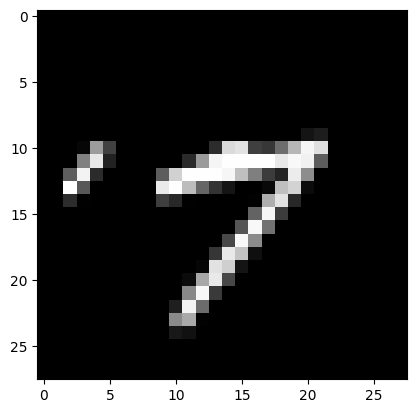

In [ ]:
show_digit_in_training_set(1023)

#Step 2 Build Model#

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#
# Create Model for Classification
#
model = Sequential() #Define Dense NN model sequentially
model.add(Flatten(input_shape=(28, 28))) # each pic input is 28x28, this will flatten into 728 internally, we don't have to worry
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #10 classes, need softmax to output probabilities

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#
# Specify optimizer, loss function and metrics during compilation
#
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) # "accuracy" is for evaluating model performance

#Step 3 Train Model#

In [ ]:
#
# ** Training **
#
# epochs = number of iterations
# batch_size = how much data to randomly used together in each training iteration, typical values 64, 128
#
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test,y_test)) # NOTE: You can also validate on-the-fly
                                                                                                  #       during training

Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.4051 - accuracy: 0.8891 - val_loss: 0.2060 - val_accuracy: 0.9391
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1736 - accuracy: 0.9497 - val_loss: 0.1508 - val_accuracy: 0.9547
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1316 - accuracy: 0.9620 - val_loss: 0.1239 - val_accuracy: 0.9639
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1067 - accuracy: 0.9681 - val_loss: 0.1202 - val_accuracy: 0.9624
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0908 - accuracy: 0.9736 - val_loss: 0.0985 - val_accuracy: 0.9695
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0772 - accuracy: 0.9774 - val_loss: 0.0951 - val_accuracy: 0.9709
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0672 - accuracy: 0.9799 - val_loss: 0.0893 - val_accuracy: 0.9733
Epoch 

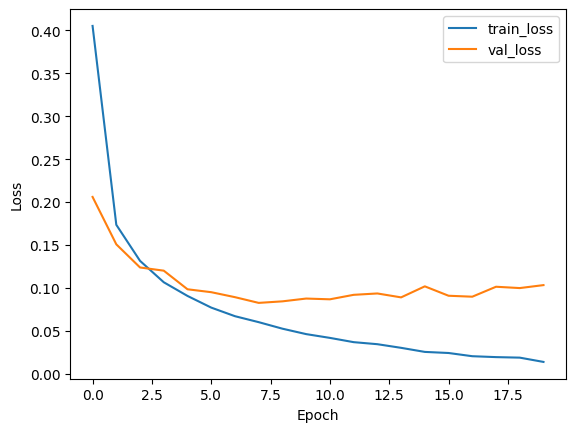

In [ ]:
import matplotlib.pyplot as plt

#
# Visualization of Loss and Accuracy
#
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train_loss')
plt.plot(epoch, val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

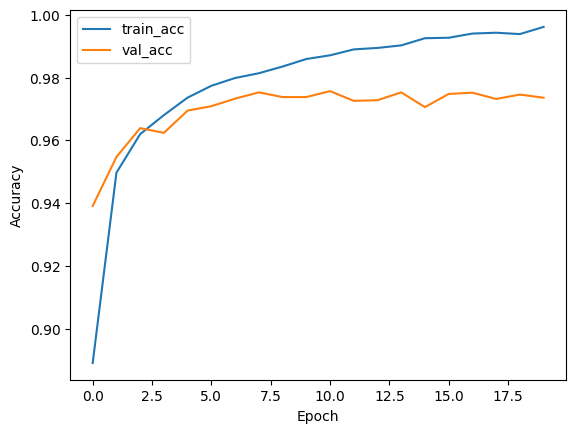

In [ ]:
plt.plot(epoch, acc, label='train_acc')
plt.plot(epoch, val_acc, label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Step 4 Evaluate Model#

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9736


In [ ]:
print('loss = ',loss)
print('accuracy = ',accuracy)

loss =  0.10338196158409119
accuracy =  0.9735999703407288


In [ ]:
#
# Save Model
#
model.save('/content/drive/MyDrive/app/mnist_nn.h5') # you can transfer this for deployment

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Step 5 Make Prediction#

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

#
# Load back the Model
#
loaded_model = load_model('/content/drive/MyDrive/app/mnist_nn.h5') # we will use its predict method

#
# Load and Convert Image
#
# img_digit_one_sample.bmp can be found here:
# https://drive.google.com/open?id=1RnqbnoRV5VWfEuWcDrtMXmB7tjZo41oK
#
# img_digit_four_sample.bmp can be found here:
# https://drive.google.com/open?id=1zyNBk8zNEDpdYPy0KzxlGda5SAKXo7ds
#
# img_digit_eight_sample.bmp can be found here:
# https://drive.google.com/file/d/1rfJO6wl6wDjmN7Dqu7ELr5FhGBW0Bswr
#
# For color, the default is color_mode='rgb'
#
#img = load_img(path="/content/drive/MyDrive/app/img_digit_one_sample.bmp", color_mode = "grayscale", target_size=(28,28))
#img = load_img(path="/content/drive/MyDrive/app/img_digit_four_sample.bmp", color_mode = "grayscale", target_size=(28,28))
img = load_img(path="/content/drive/MyDrive/app/img_digit_eight_sample.bmp", color_mode = "grayscale", target_size=(28,28))

#
# Pre-processing of input image data
#
imgArray = img_to_array(img) #convert to numpy array
print (imgArray.shape) # (28,28,1)
imgInput = imgArray/255.0 # normalization
imgInput = imgInput.reshape(1,28,28,1) # make it into an array of arrays as predict method expects this
print (imgInput.shape)

#
# Prediction
#
predictions = loaded_model.predict(imgInput) # Predict method expects an input format of array of arrays
print(predictions)

for i,x in enumerate(predictions[0]):
  print(i, "%.4f" % x)

predicted_class=np.argmax(predictions[0])
print("The predicted digit is",predicted_class)


(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 104ms/step
[[2.8513687e-08 1.0487658e-12 5.1468379e-07 2.9673607e-03 9.6288800e-17
  1.8176038e-06 9.9703014e-01 5.4681381e-14 1.3886599e-07 3.9822827e-17]]
0 0.0000
1 0.0000
2 0.0000
3 0.0030
4 0.0000
5 0.0000
6 0.9970
7 0.0000
8 0.0000
9 0.0000
The predicted digit is 6
